In [1]:
from dm_tools_dataprep import data_prep

df = data_prep()

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Columns: 103 entries, VehYear to VNST_WV
dtypes: float64(12), int64(2), uint8(89)
memory usage: 8.0 MB
None


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# preprocessing step
df = data_prep()

# target/input split
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [5]:
# OverSampling

from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from collections import Counter

ros=RandomOverSampler(random_state=0)
rs = 10

X_mat = X.as_matrix()

X_train, X_test, y_train, y_test=train_test_split(X_mat, y, test_size=0.2, stratify=y,random_state=rs)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# Oversampling tree training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=rs)
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [7]:
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))
y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.9994806633659938
Test accuracy: 0.7932738669238187
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7222
           1       0.21      0.22      0.22      1074

   micro avg       0.79      0.79      0.79      8296
   macro avg       0.55      0.55      0.55      8296
weighted avg       0.80      0.79      0.79      8296



In [8]:
# grab feature importances from the model and feature name from the original X

import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehBCost : 0.11121178987228747
VehOdo : 0.10066232815120196
MMRAcquisitionAuctionCleanPrice : 0.06358515886706172
MMRCurrentRetailCleanPrice : 0.058149204597101024
MMRCurrentAuctionAveragePrice : 0.05698475427587466
MMRAcquisitionRetailAveragePrice : 0.05683596486526123
MMRCurrentAuctionCleanPrice : 0.0548351426042077
MMRAcquisitionAuctionAveragePrice : 0.05463021723336661
VehYear : 0.0543774274081806
MMRCurrentRetailAveragePrice : 0.05430957635386498
MMRAcquisitonRetailCleanPrice : 0.05353267006304695
WarrantyCost : 0.05033985614382408
WheelType_Alloy : 0.02103730134571952
Auction_MANHEIM : 0.014853906600780897
VNST_NC : 0.009909676571872476
VNST_TX : 0.008111383234574597
VNST_CA : 0.008050116158409842
VNST_FL : 0.007254548805223008
VNST_CO : 0.007108643606383659
WheelType_Covers : 0.006341422205261949


In [9]:
# visualize

import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OverSampledTree_1.png")

In [10]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.6331059792957795
Test accuracy: 0.563404050144648
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      7222
           1       0.18      0.69      0.29      1074

   micro avg       0.56      0.56      0.56      8296
   macro avg       0.55      0.62      0.49      8296
weighted avg       0.83      0.56      0.63      8296



In [11]:
# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OversampledTree_2.png") # saved in the following file

VehYear : 0.46050460247828146
WheelType_Alloy : 0.21802973465865777
VehBCost : 0.1594881029200245
Auction_MANHEIM : 0.09759878560795003
WheelType_Covers : 0.06437877433508617
MMRAcquisitionRetailAveragePrice : 0.0
Make_PONTIAC : 0.0
Make_KIA : 0.0
Make_LEXUS : 0.0
Make_LINCOLN : 0.0
Make_MAZDA : 0.0
Make_MERCURY : 0.0
Make_MINI : 0.0
Make_MITSUBISHI : 0.0
Make_NISSAN : 0.0
Make_OLDSMOBILE : 0.0
Make_SATURN : 0.0
MMRAcquisitonRetailCleanPrice : 0.0
Make_SCION : 0.0
Make_SUBARU : 0.0


In [12]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_resampled, y_resampled)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_resampled, y_resampled))

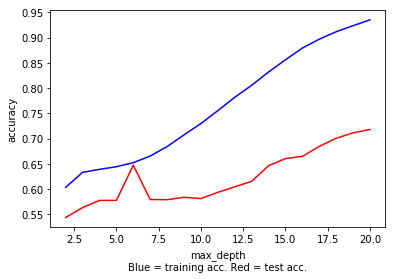

In [14]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 10),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.701433369109857
Test accuracy: 0.5848601735776278
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      7222
           1       0.18      0.64      0.28      1074

   micro avg       0.58      0.58      0.58      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.58      0.65      8296

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 20}


In [17]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 10),
          'min_samples_leaf': range(60, 100, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.6894540040854482
Test accuracy: 0.5859450337512054
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      7222
           1       0.18      0.64      0.29      1074

   micro avg       0.59      0.59      0.59      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.59      0.65      8296

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 60}


In [18]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 15),
          'min_samples_leaf': range(10, 70, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8071703077935117
Test accuracy: 0.6404291224686596
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      7222
           1       0.18      0.49      0.26      1074

   micro avg       0.64      0.64      0.64      8296
   macro avg       0.54      0.58      0.51      8296
weighted avg       0.80      0.64      0.70      8296

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 10}


In [19]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools_OptTree import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree_Oversampled.png")

VehBCost : 0.11944773208858668
VehYear : 0.1017756063551572
VehOdo : 0.09585757676360965
MMRCurrentAuctionAveragePrice : 0.06905408633890482
MMRAcquisitionAuctionCleanPrice : 0.06259881124095651
MMRCurrentAuctionCleanPrice : 0.05588669669846214
MMRAcquisitonRetailCleanPrice : 0.055877427497069594
MMRAcquisitionRetailAveragePrice : 0.05518380869513675
MMRCurrentRetailCleanPrice : 0.054736345960291276
MMRAcquisitionAuctionAveragePrice : 0.05044773482095055
WheelType_Alloy : 0.04132175467879561
WarrantyCost : 0.04122440940939464
MMRCurrentRetailAveragePrice : 0.03751349848695527
Auction_MANHEIM : 0.027324700653301642
WheelType_Covers : 0.01220128953402062
VNST_NC : 0.009124777933491313
TopThreeAmericanName_GM : 0.008291493166572256
VNST_TX : 0.007984137252749834
Make_DODGE : 0.006121261634691856
VNST_OK : 0.0058877771593164735


In [20]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 20),
          'min_samples_leaf': range(20, 100, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.830540456323789
Test accuracy: 0.684787849566056
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      7222
           1       0.19      0.44      0.26      1074

   micro avg       0.68      0.68      0.68      8296
   macro avg       0.54      0.58      0.53      8296
weighted avg       0.80      0.68      0.73      8296

{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 20}
